# **Phần 2. Báo cáo Jupyter Notebook**

MSSV: 23120172

Họ và tên: Trần Thị Thủy Tiên

## **2.1. Giới thiệu**

### <font color='green'>2.1.1. Tổng quan về ba phương pháp được so sánh.</font>

Phép nhân ma trận là một trong những phép toán nền tảng và quan trọng trong Khoa học Máy tính và Khoa học Dữ liệu. Hiệu năng của phép toán này ảnh hưởng trực tiếp đến tốc độ của vô số ứng dụng sử dụng nó. Bài phân tích này sẽ thực hiện đo lường và so sánh hiệu năng thời gian chạy của phép nhân ma trận qua ba phiên bản lập trình khác nhau với các phần tử trong ma trận là các số được sinh ngẫu nhiên có giá trị từ 0 đến 1. Cụ thể, ba phiên bản lập trình mà bài phân tích này đã sử dụng là:
- **Phiên bản C thuần túy**: Đại diện cho nhóm ngôn ngữ <u>biên dịch bậc thấp</u>, mã nguồn C được dịch trực tiếp sang mã máy dành riêng cho phần cứng. Do đó, phiên bản này được xem là "tiêu chuẩn vàng" về mặt hiệu năng và được kỳ vọng sẽ cho <font color='blue'>thời gian thực thi nhanh nhất</font>, đặc biệt là với các ma trận có kích thước lớn.

- **Phiên bản Python thuần túy**: Đại diện cho nhóm ngôn ngữ <u>thông dịch bậc cao</u>, phương pháp này sử dụng các cấu trúc dữ liệu `(list lồng nhau)` và `vòng lặp (for)` gốc của Python để thực hiện phép nhân. Do đó, phiên bản này được dự đoán là sẽ có <font color='blue'>hiệu năng chậm nhất</font> trong ba phương pháp, sự chênh lệch sẽ càng rõ rệt khi kích thước ma trận tăng lên.

- **Phiên bản NumPy (Python với thư viện tối ưu hóa)**: Mặc dù cú pháp được viết bằng Python, các phép toán tính toán nặng như nhân ma trận thực chất được thực thi bởi <u>mã C</u> hoặc <u>Fortran</u> đã được biên dịch sẵn và tối ưu hóa cao ở phía sau. Do đó, phiên bản NumPy được kỳ vọng sẽ <font color='blue'>nhanh hơn vượt trội so với Python thuần túy và có thể tiệm cận hiệu năng của phiên bản C</font>.

### <font color='green'>2.1.2. Giải thích phương pháp đo lường thời gian.</font>

Để đo lường và so sánh hiệu năng của ba phương pháp một cách chính xác nhất, việc đo thời gian của phương pháp sẽ chỉ được bắt đầu khi phép nhân ma trận thực hiện (nghĩa là **không** bao gồm việc khởi tạo, cấp phát, giải phóng bộ nhớ,...). Kết quả thời gian sau cùng theo đơn vị mili giây (ms) sẽ được tính theo cách lấy `thời gian kết thúc - thời gian bắt đầu`. Ba phương pháp sẽ có hai cách đo, cụ thể là:
- **Phiên bản C thuần túy**: Sử dụng hàm `clock()` từ thư viện <time.h>. Hàm này trả về số "nhịp" (clock ticks) của CPU đã được sử dụng bởi chương trình kể từ khi nó bắt đầu, lấy hiệu số `clock()` trước và sau khi gọi hàm `matrix_multiplication`, sẽ được số nhịp CPU dành riêng cho phép nhân, đây cũng sẽ là thời gian xử lý thực tế của CPU.

- **Phiên bản Python thuần túy** và **Phiên bản NumPy (Python với thư viện tối ưu hóa)**: Sử dụng `time.time()` từ module `time`. Hàm này trả về "thời gian đồng hồ treo tường" (wall-clock time), tức là số giây thực tế đã trôi qua kể từ một mốc cố định bằng cách lấy hiệu số `time.time()` trước và sau khi thực hiện vòng lặp (đối với Python thuần túy) hoặc phép toán `@` (đối với NumPy).

### <font color='green'>2.1.3. Mô tả cách các ma trận được khởi tạo.</font>

Trong cả ba phiên bản, hai ma trận đầu vào `A` và `B` đều là các ma trận vuông có kích thước `n x n`. Các phần tử của chúng được khởi tạo bằng các giá trị số thực ngẫu nhiên trong khoảng từ 0.0 đến 1.0. Ma trận kết quả `C` ban đầu được khởi tạo với tất cả các phần tử bằng 0 để chuẩn bị cho quá trình tính tổng tích lũy. Tuy nhiên, mỗi phiên bản sử dụng một kỹ thuật khác nhau để sinh dữ liệu:
- **Phiên bản C thuần túy**:  Sử dụng hai vòng lặp `for` lồng nhau để duyệt qua và gán giá trị cho từng phần tử của ma trận. Giá trị ngẫu nhiên được tạo ra bằng cách gọi hàm `rand()` từ thư viện <stdlib.h> rồi chia cho hằng số `RAND_MAX`.

- **Phiên bản Python thuần túy**: Sử dụng một cấu trúc `list comprehension` lồng nhau. Hàm `random.uniform(min_val, max_val)` được dùng để sinh ra một số thực ngẫu nhiên.

- **Phiên bản NumPy (Python với thư viện tối ưu hóa)**: Thay vì dùng vòng lặp để tạo từng phần tử, NumPy tạo ra toàn bộ ma trận chỉ bằng một lệnh duy nhất. Hàm `np.random.uniform()` được gọi để tạo ra một mảng hai chiều (ma trận) có kích thước `n x n` với các giá trị ngẫu nhiên.

### <font color='green'>2.1.4. Các kích thước ma trận được dùng để kiểm thử.</font>

Trong bài phân tích này sử dụng 3 kích thước ma trận để kiểm thử 3 phương pháp trên. Cụ thể, các ma trận sẽ có kích thước là **128 x 128, 256 x 256 và 512 x 512**.


## **2.3. Khiển khai**

Tại đây, source code của ba phương pháp sẽ được thể hiện:

- **Phiên bản C thuần túy**: Xem trực tiếp tại file [`matrix_mult.c`](matrix_mult.c).
- **Toàn bộ đoạn code (cả ba phương pháp)**:

In [1]:
import sys
import os
import subprocess
import re
import random
import time
import numpy as np
import pandas as pd

matrix_size = [128, 256, 512]
number_trials = 4
c_source_file = "matrix_mult.c"

if sys.platform == "win32":
    c_executable_file = "matrix_mult.exe"
else:
    c_executable_file = "matrix_mult"

def run_compile_c(n):
    try:
        result = subprocess.run(
            [c_executable_file, str(n)],
            capture_output=True, text=True, timeout=60  # thêm timeout
        )
        match = re.search(r"(\d+\.\d+)", result.stdout)
        if match:
            return float(match.group(1))
        else:
            print("Output:", result.stdout)
            return None
    except subprocess.TimeoutExpired:
        print(f"Chạy C code quá lâu với n={n}")
        return None
    except Exception as e:
        print(f"Lỗi khi chạy C code: {e}")
        return None

def create_matrix(n, min_val, max_val):
    return [[round(random.uniform(min_val, max_val), 2) for _ in range(n)] for _ in range(n)]

def run_compile_purepython(n):
    min_value = 0.0
    max_value = 1.0
    A = create_matrix(n, min_value, max_value)
    B = create_matrix(n, min_value, max_value)
    C = create_matrix(n, 0.0, 0.0) # ma trận kết quả

    t = time.time()

    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                C[i][j] += A[i][k] * B[k][j]

    return ((time.time() - t) * 1e3)

def run_compile_numpypython(n):
    min_value = 0.0
    max_value = 1.0

    A = np.random.uniform(low=min_value, high=max_value, size=(n, n)).round(2)
    B = np.random.uniform(low=min_value, high=max_value, size=(n, n)).round(2)

    t = time.time()

    C= A @ B

    return ((time.time() - t) * 1e3)

def main():
    if not os.path.exists(c_executable_file):
        print("Chưa có file matrix_mult.exe! Hãy biên dịch trước trong MSYS2 UCRT64.")
        sys.exit(1)
    else:
        print("Đã có file matrix_mult.exe, bỏ qua bước biên dịch.")

    all_results = []

    for n in matrix_size:
        c_times = []
        pure_times = []
        numpy_times = []

        for _ in range(number_trials):
            c_time = run_compile_c(n)
            if c_time is not None:
                c_times.append(c_time)
        
        for _ in range(number_trials):
            pure_times.append(run_compile_purepython(n))

        for _ in range(number_trials):
            numpy_times.append(run_compile_numpypython(n))

        avg_c_time = sum(c_times)/len(c_times) if c_times else 0
        avg_pure_time = sum(pure_times)/len(pure_times) if pure_times else 0
        avg_numpy_time = sum(numpy_times)/len(numpy_times) if numpy_times else 0

        all_results.append({
            "Matrix size": f"{n}x{n}",
            "C Implementation (ms)" : avg_c_time,
            "Pure Python Implementation (ms)" : avg_pure_time,
            "NumPy Implementation (ms)" : avg_numpy_time,
        })
    
    df = pd.DataFrame(all_results)
    for col in df.columns[1:]:
        df[col] = df[col].apply(lambda x: f"{x:.2f}")

    print("\n\n--- KẾT QUẢ SO SÁNH HIỆU NĂNG ---")
    print(df.to_string(index=False))

if __name__ == "__main__":
    main()

Đã có file matrix_mult.exe, bỏ qua bước biên dịch.


--- KẾT QUẢ SO SÁNH HIỆU NĂNG ---
Matrix size C Implementation (ms) Pure Python Implementation (ms) NumPy Implementation (ms)
    128x128                  2.50                          409.80                     28.23
    256x256                 31.75                         3326.15                      0.68
    512x512                252.00                        41329.98                      6.74


**<font color='blue'>Mô tả quá trình biên dịch và thực thi mã C từ Python:</font>**

Toàn bộ quá trình này được tự động hóa bằng cách sử dụng module `subprocess` của Python, cho phép một script Python ra lệnh cho hệ điều hành.

*Bước biên dịch*: Quá trình này được thực hiện trong hàm `compile_c_code()`.



In [2]:
def compile_c_code():
    compile_command = ["gcc", "-O3", c_source_file, "-o", c_executable_file] # Compile with optimization flag
    subprocess.run(compile_command, check=True, capture_output=True, text=True)
    print("Biên dịch code C thành công! Vui lòng chờ code chạy xong!")
    return True

   - Script Python chuẩn bị một câu lệnh biên dịch dưới dạng một danh sách: `["gcc", "-O3", "matrix_mult.c", "-o", "matrix_mult.exe"].`
   - `subprocess.run()` được gọi để thực thi câu lệnh này, tương đương với việc gõ `gcc -O3 matrix_mult.c -o matrix_mult.exe` vào terminal.
   - Cờ `-O3` được sử dụng để yêu cầu trình biên dịch `gcc` thực hiện các tối ưu hóa ở mức độ cao nhất, đảm bảo code C chạy với hiệu năng tốt nhất có thể.

*Bước thực thi*: Sau khi đã có file thực thi, quá trình này được thực hiện trong hàm `run_compile_c(n)`.

In [3]:
def run_compile_c(n):
    run_command = ['./' + c_executable_file, str(n)]
    result = subprocess.run(run_command, capture_output=True, text=True, check=True)
    match = re.search(r"(\d+\.\d+)", result.stdout) # Trích ra một số có các số đứng sau dấu chấm (.)
    # Số này sẽ là thời gian thực thi
    if match:
        return float(match.group(1))
    else:
        print("Lỗi: Không thể trích xuất thời gian từ output của file C.")
        print("Output nhận được:", result.stdout)
        return None

- Script Python chuẩn bị một câu lệnh chạy: `['./matrix_mult.exe', '512']` (ví dụ với n=512).
- `subprocess.run()` lại được gọi để thực thi chương trình này. Kích thước ma trận n được truyền vào dưới dạng một đối số dòng lệnh, sau đó được đọc bởi hàm main trong code C.
- Tham số `capture_output=True` yêu cầu Python "bắt" lại tất cả nội dung mà chương trình C in ra (dòng printf chứa thời gian thực thi).
- Cuối cùng, script Python xử lý chuỗi văn bản đã bắt được để trích xuất con số thời gian và ghi nhận kết quả.

## **2.4. Trực quan hóa kết quả**

### <font color='green'>2.4.1. Biểu đồ đường.</font>

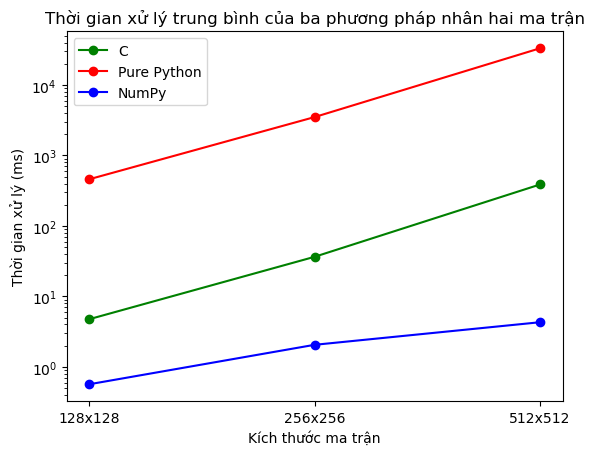

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Vẽ đồ thị
plt.plot(['128x128', '256x256', '512x512'], [4.75, 36.5, 387.5], 'go-', label='C')
plt.plot(['128x128', '256x256', '512x512'], [459.235, 3503.87, 33157.2], 'ro-', label='Pure Python')
plt.plot(['128x128', '256x256', '512x512'], [0.5675, 2.06, 4.3075], 'bo-', label='NumPy')

plt.yscale('log')

# Đặt tiêu đề và nhãn cho các trục
plt.title('Thời gian xử lý trung bình của ba phương pháp nhân hai ma trận')
plt.xlabel('Kích thước ma trận')
plt.ylabel('Thời gian xử lý (ms)')

# Hiển thị chú thích
plt.legend(loc='best')

plt.show()

### <font color='green'>2.4.2. Phân tích hệ số tăng tốc.</font>


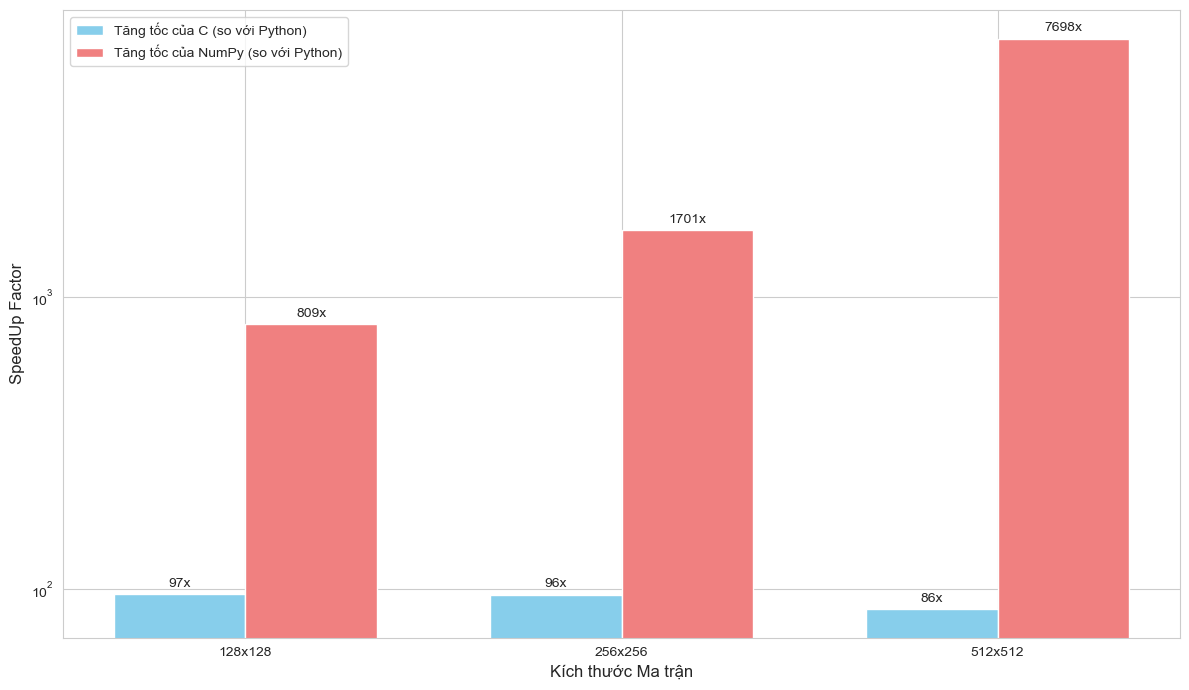

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    "Matrix Size": ["128x128", "256x256", "512x512"],
    "C": [4.75, 36.5, 387.5],
    "Pure Python": [459.235, 3503.87, 33157.2],
    "NumPy": [0.5675, 2.06, 4.3075]
}
df = pd.DataFrame(data)
df = df.set_index("Matrix Size") # Đặt kích thước ma trận làm chỉ số

baseline = "Pure Python"

# Tính hệ số tăng tốc = Thời gian chậm / Thời gian nhanh
df['NumPy_Speedup'] = df[baseline] / df['NumPy']
df['C_Speedup'] = df[baseline] / df['C']


sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

x = np.arange(len(df.index))
width = 0.35  # Độ rộng của mỗi cột

# Vẽ các cột cho "C Speedup"
rects1 = plt.bar(x - width/2, df['C_Speedup'], width, label='Tăng tốc của C (so với Python)', color='skyblue')

# Vẽ các cột cho "NumPy Speedup"
rects2 = plt.bar(x + width/2, df['NumPy_Speedup'], width, label='Tăng tốc của NumPy (so với Python)', color='lightcoral')

plt.ylabel('SpeedUp Factor', fontsize=12)
plt.xlabel('Kích thước Ma trận', fontsize=12)
plt.xticks(x, df.index)
plt.legend()

plt.yscale('log')

# Thêm nhãn số liệu trên đầu mỗi cột cho dễ đọc
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.annotate(f'{height:.0f}x', # Định dạng số liệu, ví dụ: "123x"
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

**So sánh giữa C và NumPy:** Có thể dễ dàng thấy trên biểu đồ rằng *NumPy* có tốc độ thực thi tốt hơn khá nhiều so với *C* ở việc nhân hai ma trận có bất kỳ kích thước nào. Đặc biệt, ma trận càng lớn, tốc độ *NumPy* xử lý càng tỏ ra hiệu quả hơn so với *C*.



### <font color='green'>2.4.3. Bảng thống kê kết quả sau bốn lần chạy.</font>


In [3]:
import pandas as pd

data = [
    # Dữ liệu cho Lần 1
    {'Lần': 'Lần 1', 'Kích thước': '128x128', 'C': 5,    'Python': 371.91,   'NumPy': 0.58},
    {'Lần': 'Lần 1', 'Kích thước': '256x256', 'C': 46,   'Python': 3034.39,  'NumPy': 0.76},
    {'Lần': 'Lần 1', 'Kích thước': '512x512', 'C': 465,  'Python': 33314.3,  'NumPy': 4.04},
    # Dữ liệu cho Lần 2
    {'Lần': 'Lần 2', 'Kích thước': '128x128', 'C': 3,    'Python': 408.02,   'NumPy': 0.51},
    {'Lần': 'Lần 2', 'Kích thước': '256x256', 'C': 29,   'Python': 4849.88,  'NumPy': 5.68},
    {'Lần': 'Lần 2', 'Kích thước': '512x512', 'C': 457,  'Python': 27572.93, 'NumPy': 4.46},
    # Dữ liệu cho Lần 3
    {'Lần': 'Lần 3', 'Kích thước': '128x128', 'C': 6,    'Python': 475.49,   'NumPy': 0.77},
    {'Lần': 'Lần 3', 'Kích thước': '256x256', 'C': 27,   'Python': 2978.02,  'NumPy': 0.85},
    {'Lần': 'Lần 3', 'Kích thước': '512x512', 'C': 310,  'Python': 37641.52, 'NumPy': 3.69},
    # Dữ liệu cho Lần 4
    {'Lần': 'Lần 4', 'Kích thước': '128x128', 'C': 5,    'Python': 581.52,   'NumPy': 0.41},
    {'Lần': 'Lần 4', 'Kích thước': '256x256', 'C': 44,   'Python': 3153.19,  'NumPy': 0.95},
    {'Lần': 'Lần 4', 'Kích thước': '512x512', 'C': 318,  'Python': 34100.18, 'NumPy': 5.04},
]

df_flat = pd.DataFrame(data)

df = df_flat.set_index(['Lần', 'Kích thước'])

df

C    Python  NumPy
Lần   Kích thước                      
Lần 1 128x128       5    371.91   0.58
      256x256      46   3034.39   0.76
      512x512     465  33314.30   4.04
Lần 2 128x128       3    408.02   0.51
      256x256      29   4849.88   5.68
      512x512     457  27572.93   4.46
Lần 3 128x128       6    475.49   0.77
      256x256      27   2978.02   0.85
      512x512     310  37641.52   3.69
Lần 4 128x128       5    581.52   0.41
      256x256      44   3153.19   0.95
      512x512     318  34100.18   5.04

## **2.5. Phân tích và thảo luận** 

### <font color='green'>2.5.1. Xếp hạng tốc độ thực thi. </font>

Dựa theo kết quả thời gian thực thi trung bình sau 4 lần chạy của 3 phương pháp, ta có thể dễ dàng thấy:
- **NumPy** có tốc độ chạy <font color='blue'>nhanh nhất</font> với thời gian dưới 5ms cho ma trận *512 x 512*, ma trận *128 x 128* và *256 x 256* cũng chỉ tốn chưa tới 1ms đã cho ra kết quả. **C thuần túy** có kết quả thời gian thực thi cũng khá tốt dù không quá tối ưu như **NumPy**.
- **Python thuần túy** không ngoài dự đoán đã có kết quả thời gian thực thi <font color='blue'>chậm nhất</font> trong 3 phương pháp. Ở ma trận kích thước *512 x 512*, nó chạy kém hơn **C thuần túy** 86 lần và kém hơn **NumPy** đến gần 7700 lần. Ở các kích thước ma trận nhỏ hơn, tuy thời gian xử lý của nó sẽ nhanh hơn nhưng cách biệt của nó với 2 phương pháp bên trên vẫn khá lớn.

### <font color='green'>2.5.2. Scaling behavior. </font>

Tiến hành tính tỷ lệ tăng trưởng khi kích thước n tăng gấp đôi để so sánh với con số lý thuyết là $O(n^3)$ hay 8 lần.
Kết quả tỷ lệ tăng trưởng như sau:

In [7]:
import pandas as pd

data = [
    {'Tăng trưởng': '256/128', 'C': '7.68',    'Python': 7.63,   'NumPy': 3.63},
    {'Tăng trưởng': '512/256', 'C': '10.62',    'Python': 9.46,   'NumPy': 2.09},
]

df_flat = pd.DataFrame(data)

df = df_flat.set_index('Tăng trưởng')

df

,C,Python,NumPy
Tăng trưởng,,,
256/128,7.68,7.63,3.63
512/256,10.62,9.46,2.09


- Với **C thuần túy và Python thuần túy**, khi kích thước tăng từ `128 x 128` lên `256 x 256`, thời gian thực thi của cả C và Python đều tăng khoảng *7.6* lần. Con số này **rất gần** với kỳ vọng $O(n^3)$ là *8 lần*. Khi kích thước tăng từ `256 x 256` lên `512 x 512`, thời gian thực thi có cao hơn một chút (khoảng *9.5 - 10.6* lần), sự sai khác này có thể do các yếu tố như quản lý bộ nhớ cache của CPU hoặc các tiến trình nền của hệ điều hành. Vậy **C thuần túy và Python thuần túy** đã <font color='blue'>cơ bản đúng</font> với độ phức tạp lý thuyết $O(n^3)$.
- Với **NumPy**, thời gian thực thi tăng trưởng ít hơn đáng kể so với lý thuyết $O(n^3)$. Tỷ lệ tăng trưởng chỉ khoảng *2 - 3.6 lần* khi n tăng gấp đôi, nghĩa là <font color='blue'>không đáp ứng</font> độ phức tạp lý thuyết $O(n^3)$.

### <font color='green'>2.5.3. So sánh Python thuần và C. </font>

Lý giải cho việc vì sao phương pháp Python thuần lại có thời gian xử lý công việc nhân hai ma trận chậm hơn khá nhiều so với phương pháp C thuần đã được đề cập ở phần [2.1.1](#211-tổng-quan-về-ba-phương-pháp-được-so-sánh). Ở mục này sẽ giải thích cụ thể hơn vì sao lại có kết quả như thế này:
- **<font color='blue'>Phiên bản C thuần túy</font>** đại diện cho nhóm ngôn ngữ <u>biên dịch bậc thấp</u>, mã nguồn C được dịch *trực tiếp* sang mã máy dành riêng cho phần cứng mà CPU có thể thực thi *ngay lập tức* mà không cần bất kỳ bước trung gian nào sau khi chạy lệnh `gcc`. Do đó, phiên bản này được xem là "tiêu chuẩn vàng" về mặt hiệu năng, đặc biệt là với các ma trận có kích thước lớn. Ngoài ra, trong C, người dùng phải *khai báo rõ ràng* kiểu dữ liệu (`int`, `float`, v.v.). Trình biên dịch biết chính xác cần bao nhiêu bộ nhớ và loại phép toán nào sẽ được sử hiện, giúp tối ưu hóa. Ma trận C (mảng hai chiều) thường được lưu trữ trong một khối bộ nhớ liên tục (ví dụ: `float[n][n]`). Điều này cho phép CPU truy cập dữ liệu rất nhanh và hiệu quả, tận dụng tốt bộ nhớ cache (cache memory) của CPU.

- **<font color='blue'>Phiên bản Python thuần túy</font>** ngược lại đại diện cho nhóm ngôn ngữ <u>thông dịch bậc cao</u>, sử dụng các cấu trúc dữ liệu `(list lồng nhau)` và `vòng lặp (for)` gốc của Python để thực hiện phép nhân, sự chênh lệch về thời gian xử lý sẽ càng rõ rệt khi kích thước ma trận tăng lên. Code Python *không chạy trực tiếp* trên CPU mà được chuyển thành một dạng trung gian gọi là mã byte. Mã byte này sau đó được thực thi bởi Máy ảo Python (CPython, Jython, v.v.). Máy ảo phải đọc từng mã byte một và dịch nó thành các lệnh máy để thực thi dẫn đến *chi phí vận hành (overhead) khổng lồ* cho mỗi phép tính toán đơn giản. Kiểu dữ liệu của biến trong Python còn có thể thay đổi trong quá trình chạy, vậy nên mỗi lần người dùng thực hiện một phép cộng hoặc nhân (`A[i][k] * B[k][j]`), Python phải thực hiện đầy đủ các bước như tra cứu biến/thuộc tính, kiểm tra kiểu dữ liệu của hai đối tượng (`A[i][k]` và `B[k][j]`) tại thời điểm chạy rồi mới thực hiện phương thức nhân phù hợp. Nghĩa là Python thuần phải thực hiện **một loạt các thao tác cấp cao** và kiểm tra kiểu dữ liệu cho mỗi phép nhân khiến nó trở nên **<font color='blue'>chậm hơn hàng trăm lần</font>**.

### <font color='green'>2.5.4. Kết quả của NumPy. </font>

- Dù Python thuần và NumPy đều là ngôn ngữ Python nhưng lại có kết quả khác biệt đến vậy là vì NumPy **chuyển giao các phép tính toán** chuyên sâu sang các thư viện cấp thấp, được biên dịch bằng các ngôn ngữ như **C và Fortran**, đồng thời sử dụng các kỹ thuật tối ưu hóa phần cứng tiên tiến. Điều này giúp các thư viện như NumPy đạt hiệu suất tương đương C vì chúng đã **bỏ qua cơ chế thông dịch của Python**.

- NumPy không tự thực hiện các phép toán phức tạp, đó cũng là lý do mà nó **thường có hiệu suất tương đương hoặc gần bằng C**. Thay vào đó, nó đóng vai trò là *"người gọi" (wrapper)* cho các thư viện toán học cấp thấp. NumPy không phải là một ngôn ngữ cạnh tranh với C, mà là một giao diện cấp cao (high-level interface) trong Python để truy cập các thư viện toán học cấp thấp được viết bằng C/Fortran. Các hàm tính toán lõi của NumPy được viết bằng C và Fortran, sau đó được biên dịch thành mã máy. Khi người dùng gọi một phép toán NumPy, dữ liệu trong mảng ndarray (đã ở định dạng C) được truyền trực tiếp đến các hàm C/Fortran, **loại bỏ chi phí thông dịch** của Python.

- NumPy đạt được hiệu suất tối đa bằng cách dựa vào các thư viện và kỹ thuật tối ưu hóa sau: 
    - **BLAS và LAPACK**: NumPy kết nối với các triển khai BLAS (một bộ thư viện chuẩn chứa các hàm hiệu suất cao cho các phép toán vector và ma trận cơ bản)/LAPACK (cung cấp các hàm cấp cao hơn cho các bài toán đại số tuyến tính phức tạp hơn) đã được tối ưu hóa triệt để để tận dụng kiến trúc CPU cụ thể.

    - **Tận dụng Bộ nhớ Cache**: Các thư viện BLAS sử dụng kỹ thuật chia khối (blocking) để chia ma trận lớn thành các khối nhỏ vừa với **bộ nhớ cache L1/L2/L3** của CPU. Điều này giúp tối đa hóa việc tái sử dụng dữ liệu trong cache, tránh việc phải truy cập RAM chậm hơn nhiều lần.

    - **Vector hóa**: SIMD cho phép CPU thực hiện **nhiều phép toán cùng một lúc** chỉ bằng một lệnh. Điều này nhân tốc độ xử lý lên nhiều lần so với việc xử lý tuần tự từng cặp số.

### <font color='green'>2.5.5. Những kết quả gây bất ngờ. </font>

Theo như các kết quả của các bài báo cáo, NumPy được ghi nhận là **thường có hiệu suất tương đương hoặc gần bằng C** nhưng trong bài phân tích này, NumPy lại có kết quả **vượt trội hơn C**, đặc biệt là ở các ma trận lớn. NumPy đã nhanh hơn C hàng trăm lần ở kích thước nhỏ `(128 × 128)` và vẫn nhanh hơn C gần 100 lần ở kích thước lớn `(512 × 512)`. Điều này là do NumPy không sử dụng thông dịch Python; thay vào đó, nó tận dụng các thư viện cấp thấp được biên dịch sẵn (BLAS, LAPACK) được viết bằng C/Fortran. Ngoài ra, NumPy lại **không** tuân theo tốc độ tăng trưởng lý thuyết $O(n^3)$ chặt chẽ như C và Python thuần. Việc tăng kích thước ma trận lên đến một con số đủ lớn có thể sẽ khiến cho NumPy phải tuân thủ tốc độ đó nhưng ở 3 kích thước đã kiểm thử thì việc nó đã làm giảm hằng số C trong công thức $T = C.n^3$ nhờ tối ưu hóa phần cứng cũng khá bất ngờ.

## **2.6. Kết luận**

Các thí nghiệm so sánh hiệu năng nhân ma trận giữa C, Python thuần, và NumPy đã mang lại những phát hiện then chốt sau:

- **Sự khác biệt to lớn về tốc độ thực thi**: 
    - NumPy tỏ ra vượt trội hơn hẳn: NumPy là phương pháp <u>nhanh nhất</u>, vượt trội hơn Python thuần từ 5,000 đến 10,000 lần và nhanh hơn C từ 10 đến 100 lần (tùy thuộc vào kích thước ma trận). Sở dĩ có kết quả này là vì NumPy đã chuyển giao các phép tính toán chuyên sâu sang các thư viện cấp thấp được tối ưu hóa cao (BLAS/LAPACK), được viết bằng C/Fortran và tận dụng tối ưu hóa phần cứng (SIMD, cache blocking).

    - Python thuần "lép vế" trong bài phân tích: Khi phải tốn thời gian chuyển code sang mã byte và nhờ máy ảo đọc từng mã byte một rồi mới dịch nó thành các lệnh máy để thực thi dẫn đến *chi phí vận hành (overhead) khổng lồ* cho mỗi phép tính toán đơn giản đã làm thời gian thực thi của Python thuần rất lâu, có thể gây ảnh hưởng chậm trễ đến các ứng dụng sử dụng phương pháp này.

- **Sự khác biệt trong tỷ lệ tăng trưởng**: 
    - Tuân thủ nghiêm ngặt: C và Python thuần **tuân thủ** tốc độ tăng trưởng lý thuyết $O(n^3)$ khá chặt chẽ với thời gian thực thi tăng xấp xỉ 7 đến 10 lần khi kích thước ma trận `(n)` tăng gấp đôi. Điều này xác nhận rằng cả hai đều thực hiện thuật toán nhân ma trận cổ điển ****một cách tuần tự** (trên một luồng) mà không có sự tối ưu hóa đáng kể nào làm thay đổi bậc thuật toán. Mặc dù C có tốc độ tuyệt đối nhanh hơn Python thuần, cả hai đều bị ràng buộc bởi cùng một độ phức tạp thời gian.
    
    - Phá vỡ lý thuyết: NumPy **không tuân thủ** tốc độ tăng trưởng lý thuyết $O(n^3)$ chặt chẽ như C và Python thuần. Thời gian thực thi của NumPy chỉ tăng khoảng 2 đến 4 lần khi n tăng gấp đôi. Hiện tượng này xảy ra là do NumPy tận dụng cơ chế **tối ưu hóa phần cứng** thông qua các thư viện số học cấp cao như BLAS/MKL/OpenBLAS. Nhưng NumPy không thực sự thay đổi độ phức tạp thuật toán cơ bản $O(n^3)$, nó chỉ thông qua đa luồng và tối ưu hóa bộ nhớ đệm để có thể làm cho thời gian thực thi thực tế gần như tuân theo mô hình $O(n^2)$ (chỉ xét việc đọc và ghi dữ liệu) trong phạm vi dữ liệu mà tối ưu hóa bộ nhớ đệm còn hiệu quả. 

- **"Cuộc chiến" của biên dịch và thông dịch**: Hiệu năng trong tính toán khoa học được quyết định bởi khả năng thoát khỏi quá trình thông dịch, chuyển giao công việc tính toán chuyên sâu cho các mã đã được biên dịch triệt để và tối ưu hóa phần cứng (đa luồng, SIMD). Kết quả thí nghiệm nhân ma trận đã minh họa rõ nét "cuộc chiến" về hiệu năng giữa biên dịch và thông dịch. Python thuần (**thông dịch**) là bên **thua cuộc** rõ ràng, chậm hơn C và NumPy tới hàng ngàn lần bởi mỗi phép tính phải chịu chi phí vận hành (overhead) lớn từ việc thông dịch từng dòng mã và quản lý kiểu dữ liệu động. Ngược lại, C (**biên dịch**) **nhanh hơn nhiều** do chuyển đổi trực tiếp sang mã máy.
